<a href="https://colab.research.google.com/github/mpfoster/Biochem5721/blob/master/basic_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python, Jupyter Notebooks and Statistics
(Biochem 5721 AU21 MPF)

A Jupyter notebook is an interactive web browser-based container for code, graphics and text. 

This is a Jupyter _markdown_ cell, which contains styled text. Jupyter _code_ cells contain executable code (Python in this case). The code in those cells is executed by _running_ the cell: **Cmd/Crt-Enter**, or clicking on the triagle to the left of the cell. Note that code cells in a Notebook that depend on the results of other cells must be executed in the right order.

---
## Importing pre-defined tools
First, we load some common _packages_ that will define functions we will use to compute the values of interest, and plot the results (importing them means we can use previously written code, without having to re-write it ourselves):

In [1]:
import numpy as np  # this hashtag separates code from comments. 
import matplotlib.pyplot as plt   # the shortcut plt = matplotlib.pyplot

Now we can access all _Numpy_ functions by using the prefix _np_, as in `np.mean(2, 3, 4)` to compute the mean of the numbers 2, 3 and 4. The _Pyplot_ library from _Matplotlib_ is similarly accessed via the prefix `plt`

## The aggregate behavior of individual molecules can be summarized with statistics
We start by considering the step sizes measured for the Myosin V motor walking on immobilized actin filaments (Yildiz _et al._ (2003) _Science_, Fig. 3).

 <figure>
  <img src="https://science.sciencemag.org/content/sci/300/5628/2061/F3.large.jpg?download=true" width="50%">
  <figcaption>Yildiz et al. 2003, Fig. 3</figcaption>
</figure> 

To analyze the data we make a list of measured step lengths, which we'll call `steps`:

In [2]:
# from Yildiz et al.(2003) Science, Fig. 3, red trace
steps = 65.1,83.5, 69.8,64.2,78.8,70.0,70.9,79.1,67.4,68.8,73.7,70.7,70.1,68.9,\
  71.3,82.4,72.0,75.4

Executing a stand-alone function (or the name of a variable) will cause the result (or content) to be printed to the output cell:

In [3]:
np.mean(steps)

72.3388888888889

As for the list, we could assign the result of a function to a variable:

In [15]:
mean = np.mean(steps)
mean

72.3388888888889

In [4]:
np.std(steps,ddof=1)  # we use ddof = 1 when computing the STDEV of a sample

5.502634544298265

In [5]:
len(steps)  # this counts the number of elements in the list

18

We see that the mean and standard deviation of these 18 steps differ from the mean and stdev obtained for the full dataset of 231 steps: 73.75 ± 5.25. Why?

Some insight can be obtained from visually inspecting the distribution of the data. [**Always visualize the raw data before proceeding with analysis.**] We can do this easily by plotting a _histogram_. 

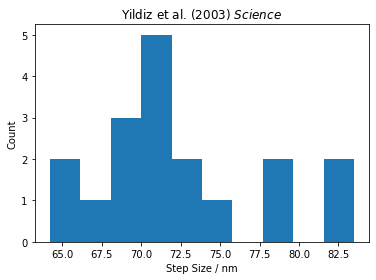

In [6]:
plt.hist(steps) # by default plt.hist() creates 10 evenly-spaced bins
plt.ylabel('Count'); plt.xlabel('Step Size / nm')
plt.title('Yildiz et al. (2003) $Science$')
plt.show()

Are the data Gaussian/Normal distribution?

We can compare the distribution of this sample to a Gaussian distribution featuring the reported parameters, by simulating a probability distribution function (PDF). 

We first define a function to compute a y value for each x value
given a known mean μ and standard deviation σ.

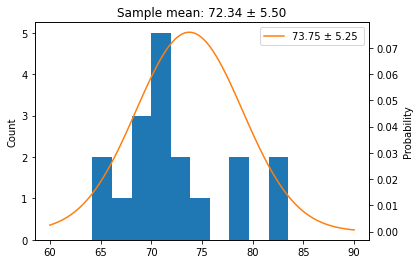

In [98]:
# function takes a list of x values, mu and sig as input; returns y
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

# generate the x and y values of the Gaussian
xval = np.linspace(60,90,100) # 100 points between 60 and 90
mu = 73.75; sigma = 5.25  # the published values
yval = gaussian(xval, mu, sigma)

# the data will have different y-axis ranges, so create a plot w/ 2 axes: 
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot the histogram of the data
ax1.hist(steps)
ax1.set_ylabel('Count')

ax2.plot(xval,yval, color='C1', label= '%.2f ± %.2f ' % (mu, sigma))
plt.xlabel('Step Size /nm')
ax2.set_ylabel('Probability')
plt.title('Sample mean: %.2f ± %.2f' %(np.mean(steps), np.std(steps,ddof=1)))
plt.legend()
plt.show()

We see that the distribution of 18 points differs a bit from the distribution computed from all 231 data points. What if we had fewer points? (How many should we record?)

In [17]:
sample = steps[0:3] # the 0th, 1st, and 2nd values of the list
sample

(65.1, 83.5, 69.8)

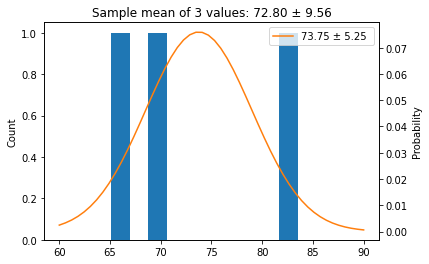

In [100]:
fig, ax1 = plt.subplots()
ax1.hist(sample)
ax1.set_ylabel('Count')

ax2 = ax1.twinx()
xval = np.linspace(60,90)
mu = 73.75; sigma = 5.25
yval = gaussian(xval, mu, sigma)
ax2.plot(xval,yval, color='C1', label= '%.2f ± %.2f ' % (mu, sigma))
plt.xlabel('Step Size /nm')
ax2.set_ylabel('Probability')

smean = np.mean(sample); ssdev = np.std(sample,ddof=1); slen = len(sample)
plt.title('Sample mean of %d values: %.2f ± %.2f' %(slen,smean,ssdev))
plt.legend()
plt.show()


We see that with a smaller sample, the statistical descriptors of the data diverge from the values for a larger sample. Thus _sample size_ is an **important** consideration when designing experiments and determining statistical significance. 

## Scipy.Stats
Given the easy of defining and reusing functions in Python, it's probably not surprising that programmers have written functions to streamline analysis of populations. Indeed, the _scipy.stats_ library has a simple `describe()` function:

In [10]:
from scipy import stats
stats.describe(steps)

DescribeResult(nobs=18, minmax=(64.2, 83.5), mean=72.3388888888889, variance=30.278986928104572, skewness=0.6706085037204145, kurtosis=-0.43050942615291454)

We see that _scipy.stats.describe_ returns a _dict_: a dictionary of six variables and their values. We could assign them individually, as:

In [29]:
n,mm,m,var,sk,k = stats.describe(steps)

And then generate formatted output:

In [28]:
print("Mean %.2f, rmsd = sqrt of variance %.2f" %(m, var**(1/2)))

Mean 72.34, rmsd = sqrt of variance 5.50


## Built-in Guassian PDF from Scipy
Above, we defined our own Gaussian function using the values mu and sig for mean and stdev.  In fact, the _scipy_ library also has its own [Gaussian PDF](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), `stats.norm.pdf`, which we demonstrate here to be equivalent:

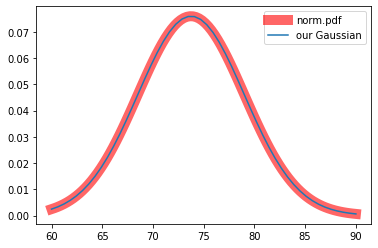

In [34]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# stats.norm.pdf takes inputs x, loc and scale
loc = 73.75; scale = 5.25 # these are the mean and stdev
# define some x and y values to plot:
x = np.linspace(60,90,100) # generate 100 linearly spaced values from 60 to 90
y = stats.norm.pdf(x, loc=loc, scale=scale) # compute probability y values for each x
plt.plot(x, y, 'r-', lw=10, alpha=0.6, label='norm.pdf')
plt.plot(xval,yval,label='our Gaussian')
plt.legend()
plt.show()

---
# Other Distributions -- e.g., NMR chemical shifts
- NMR chemical shifts are sensitive to the local chemical environment. For a tryptophan (Trp) residue in a protein, the chemical shift of the H indole proton Hϵ1 is generally well separated from other 1H signals in the molecule and can serve as useful probes of protein foldedness, flexibility and ligand binding.

- Chemical shift statistics in general are used to facilitate assignments and to determine whether the local environment is unusual.

- Chemical shift data has been tabulated by the NMR community at the BMRB (BioMagResBank, Biological Magnetic Resonance Data Bank; http://www.bmrb.wisc.edu/). Because chemical shift depends on structure, and structure depends on energy (thermodynamics), one might expect the chemical shifts for a particular atom type to exhibit a Normal (Gaussian) distribution around some mean value. We will test that assumption in this Jupyter notebook.

- BMRB data TrpHE1 The protein dataset at the BMRB consists of a series of 'csv' (comma-separated-value) plain text files. For the Trp indole 1H the file can be found at this URL: http://www.bmrb.wisc.edu/ftp/pub/bmrb/statistics/chem_shifts/full/devise/TRP_HE1_sel.txt.

- The first number is the BMRB entry ID; the next to last number is the chemical shift of the Hϵ1 nucleus.

- We will proceed by:
  -       Importing the required tools/packages
  -     Dowloading the data from the web in to a Python data frame using Pandas
  -      Performing statistical analysis to determine Mean and STDEV

We will load and plot a histogram of the chemical shift data from the BMRB: https://bmrb.io/ftp/pub/bmrb/statistics/chem_shifts/selected/aasel/TRP_HE1_sel.txt


In [35]:
# import required libraries
import pandas as pd   # helps organize the data into a dataframe
import matplotlib.pyplot as plt
from scipy import stats

In [42]:
# load data into a dataframe:
data_url='https://bmrb.io/ftp/pub/bmrb/statistics/chem_shifts/selected/aasel/TRP_HE1_sel.txt'
df = pd.read_csv(data_url,    # pandas can read the csv file from the url
    names=("id","mol","282","resi","resn","name","element","shift","n")
    )  # ^^ this adds column names for convenience
df

,id,mol,282,resi,resn,name,element,shift,n
0,36103,protein,282,32,TRP,HE1,H,4.6900,1
1,16933,protein,282,59,TRP,HE1,H,5.1154,1
2,11061,protein,282,83,TRP,HE1,H,5.1210,1
3,6334,protein,282,86,TRP,HE1,H,5.1600,1
4,28038,protein,282,63,TRP,HE1,H,5.2420,1
...,...,...,...,...,...,...,...,...,...
6229,11549,protein,282,41,TRP,HE1,H,12.1870,1
6230,34260,protein,282,131,TRP,HE1,H,12.2670,.
6231,6287,protein,282,34,TRP,HE1,H,12.4640,1
6232,11404,protein,282,46,TRP,HE1,H,13.4440,1


In [43]:
df.describe()   # pandas has built in stats tools

,id,282,resi,shift
count,6234.000000,6234.0,6234.000000,6234.000000
mean,15838.672762,282.0,58.578922,10.077587
std,8979.941692,0.0,47.044619,0.640402
min,5.000000,282.0,1.000000,4.690000
25%,6950.750000,282.0,24.250000,9.911250
50%,16505.000000,282.0,46.000000,10.130000
75%,19522.000000,282.0,82.000000,10.348000
max,50409.000000,282.0,392.000000,13.490000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed169179d0>]],
      dtype=object)

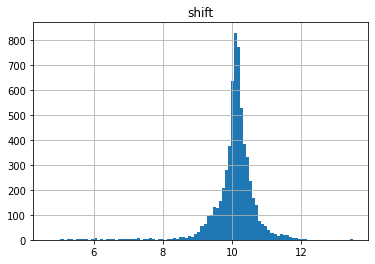

In [101]:
df.hist('shift', bins=100)  # ... and pandas can do histograms!

We can also fit the distribution to a Gaussian (Normal) shape to obtain the mean and stdev:

In [125]:
(mu, sigma) = stats.norm.fit(df['shift'])   # compute mean and stdev
print("Chemical Shift Mean: {0:.2f} ± {1:.2f} ppm".format(mu, sigma))

Chemical Shift Mean: 10.08 ± 0.64 ppm


OK, so the fit and arithmetic parameters match. But, are the data actually well described by a Gaussian? We'll plot them together to check.

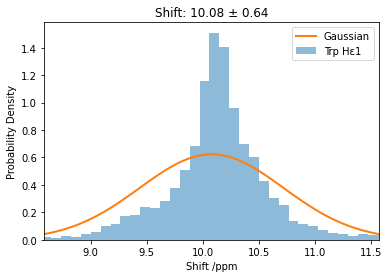

In [134]:
# Compare the data and Normal distribution:
data = df['shift']
plt.hist(data, density=True, bins=100, alpha=0.5, label='Trp Hε1')

(mu, sigma) = stats.norm.fit(data) # 
x_start=stats.norm.ppf(0.01, loc=mu, scale=sigma)
x_end = stats.norm.ppf(0.99, loc=mu, scale=sigma)
x = np.linspace(x_start, x_end, 100)
plt.plot(x, stats.norm.pdf(x,mu,sigma), label='Gaussian', lw=2)
plt.xlim(x_start,x_end)
plt.title('Shift: %.2f ± %.2f' % (mu,sigma))
plt.xlabel('Shift /ppm'); plt.ylabel('Probability Density'); plt.legend()
plt.show()

This shows that the chemical shift data are not well described by a _normal_ or _Gaussian_ distribution.

Another common distribution in spectroscopy is a _Lorentzian_, or _Cauchy_ distribution; let's try that!

In [118]:
(mu, sigma) = stats.cauchy.fit(df['shift'])   # compute mean and stdev
print("Chemical Shift Mean: {0:.2f} ± {1:.2f} ppm".format(mu, sigma))

Chemical Shift Mean: 10.14 ± 0.20 ppm


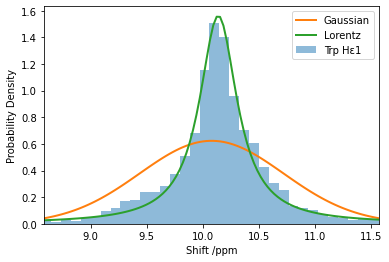

In [133]:
data = df['shift']
plt.hist(data, density=True, bins=100, alpha=0.5, label='Trp Hε1')

(mu, sigma) = stats.norm.fit(data) # 
x_start=stats.norm.ppf(0.01, loc=mu, scale=sigma)
x_end = stats.norm.ppf(0.99, loc=mu, scale=sigma)
x = np.linspace(x_start, x_end, 100)
plt.plot(x,stats.norm.pdf(x,mu,sigma), label='Gaussian', lw=2)

loc1, scale1 = stats.cauchy.fit(data)
plt.plot(x,stats.cauchy.pdf(x,loc1,scale1), label='Lorentz', lw=2)

plt.xlim(x_start,x_end)
plt.xlabel('Shift /ppm'); plt.ylabel('Probability Density'); plt.legend()
plt.show()

We see that the chemical shift distribution is better described by a Lorenztian line than a Gaussian one. That tells us something about the underlying physical chemistry that gives rise to the observed chemical shifts.

## Summary:
- Properties of ensembles result from averaging the properties of individual molecules and their measurements. 
- Adequate sampling is necessary to accurately define the shape of the distribution, and to understand the underlying physical properties.
- Distributions are often assumed to be Normal/Gaussian; this assumption should be tested to gain mechanistic insight.
